In [0]:
# Import Libraries
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
sns.set()


In [36]:
# Load dataset
url="https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/wiki_machine_learning.csv"
wiki_ml=pd.read_csv(url,delimiter=',',index_col=0,squeeze=False,delim_whitespace=True,parse_dates=True)
wiki_ml.head(5)

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [37]:
wiki_ml.tail()

,date,count,lang,page,rank,month,title
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning
372,2016-01-20,3559,en,Machine_learning,8708,201601,Machine_learning


In [38]:
wiki_ml.shape

(384, 7)

Our dataset has 384 rows and 7 columns

In [39]:
wiki_ml.dtypes

date     object
count     int64
lang     object
page     object
rank      int64
month     int64
title    object
dtype: object

In [0]:
# convert the 'date' and 'month' column to datetime format 
# wiki_ml[['date','month']] = wiki_ml[['date','month']].apply(pd.to_datetime, format='%Y-%m-%d')

In [41]:
# convert the 'Date' column to datetime format 
wiki_ml['date']= pd.to_datetime(wiki_ml['date'])
wiki_ml.dtypes

date     datetime64[ns]
count             int64
lang             object
page             object
rank              int64
month             int64
title            object
dtype: object

In [42]:
# Break data and time into separate features
# Create features for year, month, day, hour, and minute 
wiki_ml['year'] = wiki_ml['date'].dt.year 
wiki_ml['month'] = wiki_ml['date'].dt.month 
wiki_ml['day'] = wiki_ml['date'].dt.day
wiki_ml.head()

,date,count,lang,page,rank,month,title,year,day
81,2015-01-01,1414,en,Machine_learning,8708,1,Machine_learning,2015,1
80,2015-01-02,1920,en,Machine_learning,8708,1,Machine_learning,2015,2
79,2015-01-03,1338,en,Machine_learning,8708,1,Machine_learning,2015,3
78,2015-01-04,1404,en,Machine_learning,8708,1,Machine_learning,2015,4
77,2015-01-05,2264,en,Machine_learning,8708,1,Machine_learning,2015,5


In [43]:
# Set the dataFrame's index at Date column
wiki_ml = wiki_ml.set_index('date')
wiki_ml.head(3)

,count,lang,page,rank,month,title,year,day
date,,,,,,,,
2015-01-01,1414,en,Machine_learning,8708,1,Machine_learning,2015,1
2015-01-02,1920,en,Machine_learning,8708,1,Machine_learning,2015,2
2015-01-03,1338,en,Machine_learning,8708,1,Machine_learning,2015,3


#### **Time Based Indexing**

In [44]:
# Month of June 2015
wiki_ml.loc['2015-06']

,count,lang,page,rank,month,title,year,day
date,,,,,,,,
2015-06-01,2713,en,Machine_learning,8708,6,Machine_learning,2015,1
2015-06-02,2808,en,Machine_learning,8708,6,Machine_learning,2015,2
2015-06-03,2720,en,Machine_learning,8708,6,Machine_learning,2015,3
2015-06-04,2742,en,Machine_learning,8708,6,Machine_learning,2015,4
2015-06-05,2467,en,Machine_learning,8708,6,Machine_learning,2015,5
2015-06-06,1582,en,Machine_learning,8708,6,Machine_learning,2015,6
2015-06-07,1697,en,Machine_learning,8708,6,Machine_learning,2015,7
2015-06-08,2703,en,Machine_learning,8708,6,Machine_learning,2015,8
2015-06-09,2765,en,Machine_learning,8708,6,Machine_learning,2015,9


That displays the data for the month of June only, which is our focus

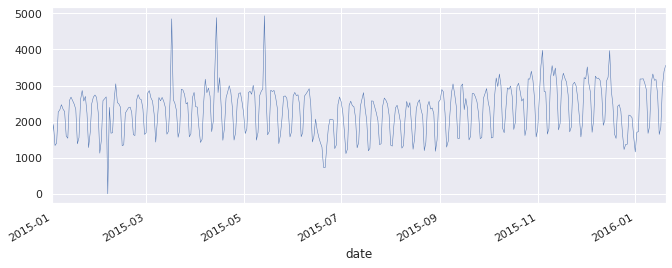

In [47]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

# Create a line plot of the full time series of the counts, 
# using the DataFrame’s plot() method.
wiki_ml['count'].plot(linewidth=0.5);

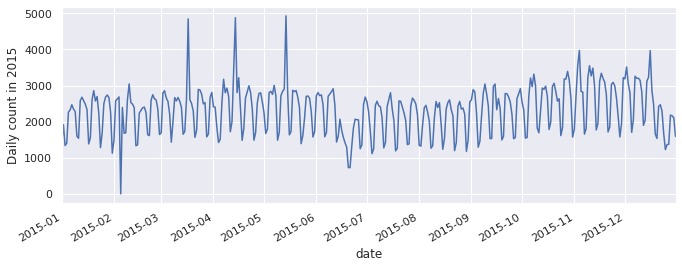

In [49]:
# Plot timeseries in a single year to investigate the count
ax = wiki_ml.loc['2015', 'count'].plot()
ax.set_ylabel('Daily count in 2015');

We see sudden dips and increase in specific months i.e a Dip in February and shoots in March, April and May

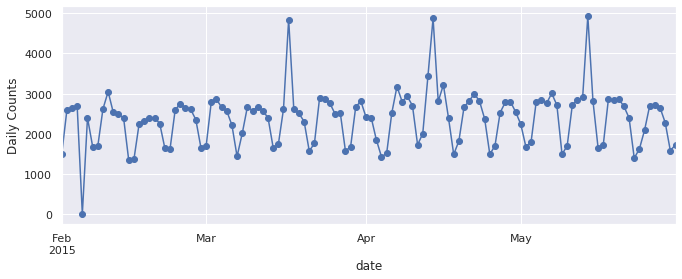

In [52]:
# Investigate further in those specific months

# Zooming in further and look at just February, March, April and May.
ax = wiki_ml.loc['2015-02':'2015-05', 'count'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Counts');

The shoots happen almost the same days in the three months.

Lets narrow down to the weeks to see if the shoots are around the same days

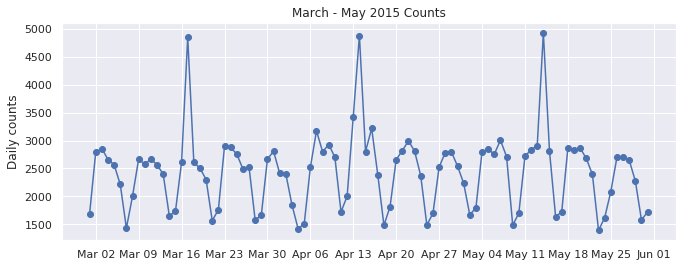

In [53]:
# Import matplotlib.dates 
# Ths will help us have a weekly timescale
import matplotlib.dates as mdates

# Create the plot directly in matplotlib. 
# Then we use mdates.WeekdayLocator() and mdates.MONDAY to set the x-axis ticks to the first Monday of each week. 
# We also use mdates.DateFormatter() to improve the formatting of the tick labels
fig, ax = plt.subplots()
ax.plot(wiki_ml.loc['2015-03':'2015-05', 'count'], marker='o', linestyle='-')
ax.set_ylabel('Daily counts')
ax.set_title('March - May 2015 Counts')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

We can clearly see that it lies within Tuesday and Thursday where we have the highest counts

#### **Seasonality**

Group the data by month, to visualize yearly seasonality

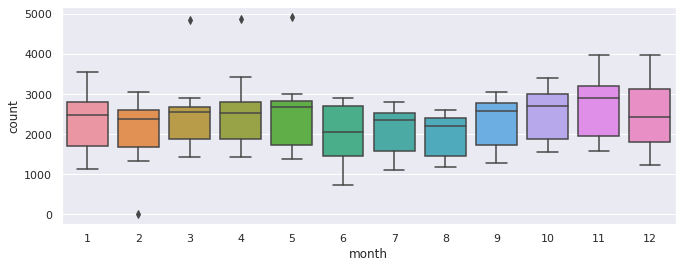

In [59]:
# Group the data by month, to visualize yearly seasonality
#time series by month
sns.boxplot(data=wiki_ml, x='month', y=name)

In [60]:
# Adding a weekday name to our dataset
wiki_ml['Weekday Name'] = wiki_ml.index.weekday_name
# Display a random sampling of 5 rows
wiki_ml.sample(5, random_state=0)

,count,lang,page,rank,month,title,year,day,Weekday Name
date,,,,,,,,,
2015-08-02,1322,en,Machine_learning,8708,8,Machine_learning,2015,2,Sunday
2015-05-05,2840,en,Machine_learning,8708,5,Machine_learning,2015,5,Tuesday
2015-07-10,2106,en,Machine_learning,8708,7,Machine_learning,2015,10,Friday
2015-02-22,1614,en,Machine_learning,8708,2,Machine_learning,2015,22,Sunday
2015-09-08,2788,en,Machine_learning,8708,9,Machine_learning,2015,8,Tuesday


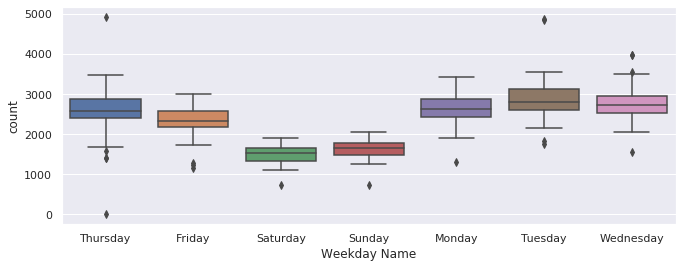

In [62]:
# Group the count time series by day of the week, to explore weekly seasonality.
sns.boxplot(data=wiki_ml, x='Weekday Name', y='count');

The counts go low during the weekends

#### **Counts for the month of June**

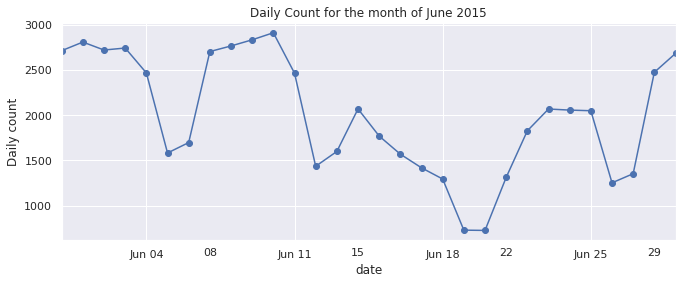

In [68]:
# Zooming in further and look at just June.
ax = wiki_ml.loc['2015-06', 'count'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily count')
ax.set_title('Daily Count for the month of June 2015')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

The counts begin highly when the month starts and dips around the mid of the month and again picks up when the month is ending